# Metabolome & hormones
## Load data

In [1]:
    from tensorly.decomposition import tucker
    import tensorly as tl  
    import numpy as np
    import pandas as pd
    import Helper as Hel
    OptionDict=dict()
    OptionDict['DecompositionType']='Tucker'#'NTF'#'Tucker'
    TensorClss = Hel.Tensor_class()
    Timepoints = [-10,0,10,20,30,45,60,75,90,120,150,180,210,240]  
    TensorClss.timepointlist=Timepoints
    file_dir = './Data/'
    Data=pd.read_excel(file_dir+'Metabolites_and_hormones_data.xlsx',header=0,index_col=0,sheet_name='Raw (glucose) ')    


## Data  preprocessing

In [2]:
    DelList=['ID','Unit','Analysed molecule']
    Data=Data.drop(DelList,axis=1)  
    DelMolList=['White blood cell count','Red blood cell count', 'Hemoglobin', 'Hematocrit', 'Platelet count', 'MCV', 'MCH','Zinc', 
                'MCHC','Glycoalbumin','ADN:LA','HbA1c(NGSP)','magnesium','IBC:CL','UIBC:CL','Ferritin','Resistin','Interleukin-6','Gly',
                'Hydroxylidine', 'Alloisleucine', 'Total bilirubin', 'AST(GOT)', 'ALT(GPT)',   'LD(LDH)', 'γ-GT', 'Isobutylamine',
                          'Homoserine','Histidinol', 'gamma-Guanidinobutyrate', 'Nicotine', '3-Hydroxybutyrate',  'Phenylpyruvate', 'Urea']  
    Data=Data.drop(DelMolList,axis=0)  

    Data=Data[~Data.index.duplicated(keep='first')]
    MolLabel=list(Data.index)

In [3]:
    Data=Data.fillna(0).copy()
    DFStack,DFConcat,TmCsDFNmlzedhDF = TensorClss.mk3dData(Data,OptionDict)
    DFConcat=pd.DataFrame(DFConcat)

## Performe HOSVD

In [4]:
    import pyper
    # Use R
    r = pyper.R(use_numpy = 'True', use_pandas='True')   
    r('library(rTensor)')
    r.assign("array3d", np.array(DFStack).astype(np.float32))
    r('HOSVD <-hosvd(as.tensor(array3d))')

'try({HOSVD <-hosvd(as.tensor(array3d))})\n\r  |                                                                            \r  |                                                                      |   0%\r  |                                                                            \r  |=======================                                               |  33%\r  |                                                                            \r  |===============================================                       |  67%\r  |                                                                            \r  |======================================================================| 100%\n'

## Molecule selection & display of each component

In [5]:
    comptimeDF = pd.DataFrame(r.get('HOSVD$U[[1]]'))
    comptimeDF.index=Timepoints
    compmetaboDF = pd.DataFrame(r.get('HOSVD$U[[2]]'))
    compmetaboDF.index=MolLabel
    compsubjectDF = pd.DataFrame(r.get('HOSVD$U[[3]]'))


['Total ketone body', 'Hydroxyproline', 'Threonine', 'Serine', 'Asparagine', 'Proline', 'Citrulline', 'α-Amino-n-butyric acid', 'Valine', 'Methionine', 'Isoleucine', 'Leucine', 'Tyrosine', 'Phenylalanine', 'Ornithine', 'Histidine', 'Lysine', 'Tryptophan', 'Arginine', '4-Methyl-2-oxopentanoate', 'Serum iron', 'BUN', '1-methylhistidine', '3 hydroxybutyric acid']
['Glucose', 'Insulin', 'C-peptide', 'GIP(Active)', 'Lactate', 'Pyruvate', 'Pancreatic glucagon', 'Growth hormone', 'Free fatty acid', 'Total ketone body', 'Total cholesterol', 'Ester type Cho', 'HDL cholesterol', 'LDL cholesterol', 'Alanine', 'Total protein', 'Albumin', 'Choline', 'Betaine', 'Creatine', 'Carnitine', 'Adrenaline', 'Acetoacetic acid', '3 hydroxybutyric acid', 'N,N-Dimethylglycine', 'Proline betaine', 'Uridine']
['5-Oxoproline', 'Choline', 'Betaine', 'Carnitine', 'Dodecanoate', 'Octanoate', 'Pelargonate', 'Decanoate', 'Undecanoate', 'Mucate', 'Trimethylamine N-oxide', 'N,N-Dimethylglycine', 'Nicotinamide', 'Pipecola

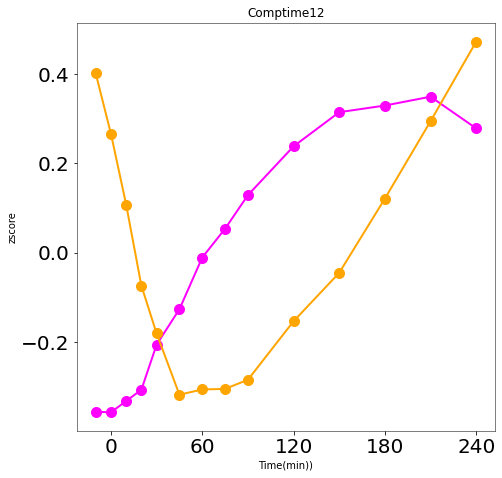

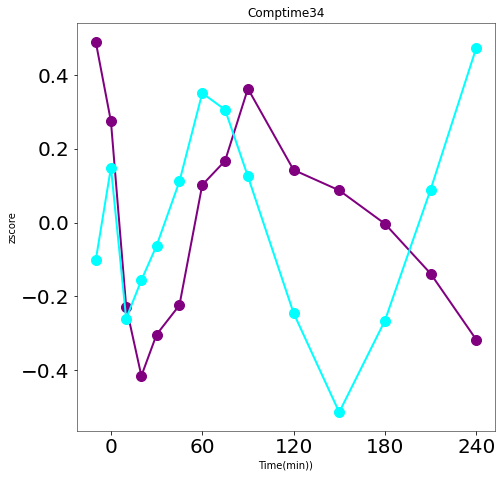

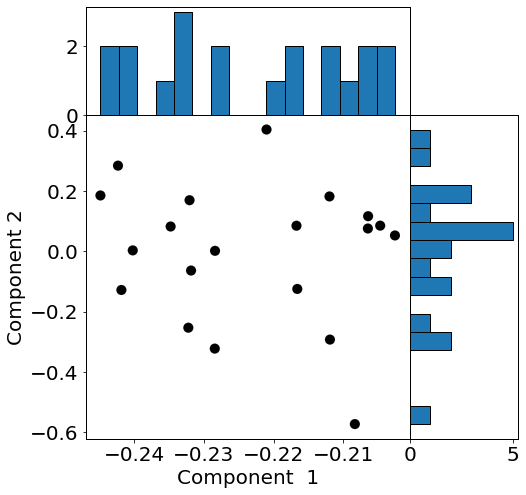

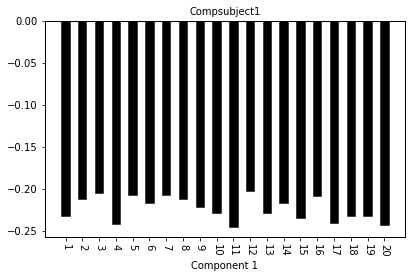

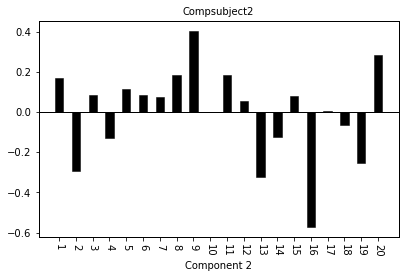

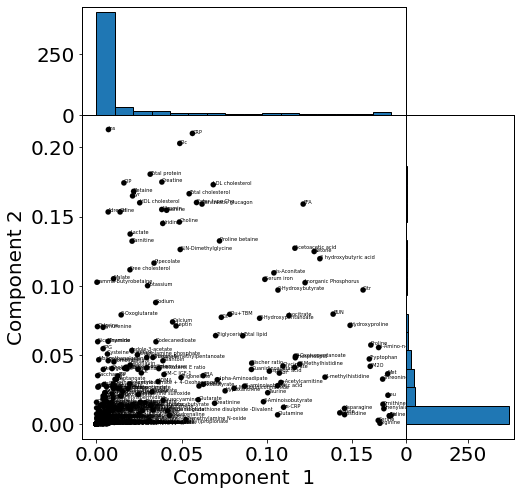

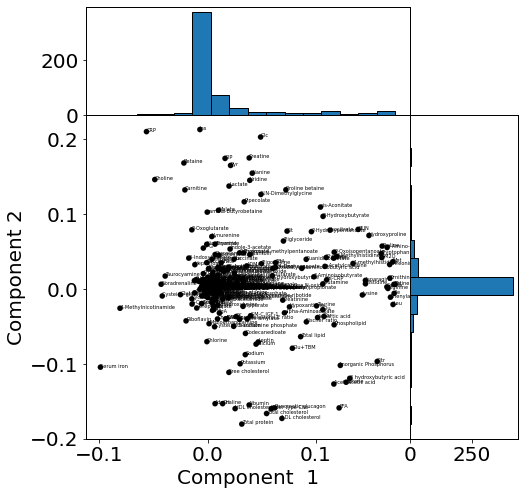

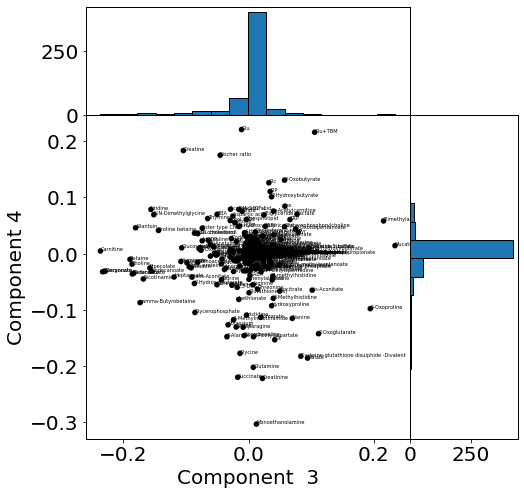

In [6]:
    OptionDict['qvalcutoff'] = 0.1
    modules = TensorClss.Analeachcomponents(comptimeDF,compmetaboDF,compsubjectDF,OptionDict)

In [205]:
print(len(modules[0]))
print(len(modules[1]))
print(len(modules[2]))
print(len(modules[3]))
print(set(modules[0]) & set(modules[1]))
print(set(modules[1]) & set(modules[3]))
print(set(modules[0]) & set(modules[3]))

24
27
18
21
{'Total ketone body', '3 hydroxybutyric acid'}
{'Glucose', 'Creatine'}
{'Asparagine', 'Lysine'}
